<div style="line-height:1.2;">

<h1 style="color:#EC804A; margin-bottom: 0.3em;">Logistic regression trials 2</h1>

<h4 style="margin-top: 0.3em; margin-bottom: 1em;">Multinomial and One-vs-Rest Logistic Regression in sklearn.</h4>

<div style="line-height:1.4; margin-bottom: 0.5em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> 
    span style markdown + colormaps + matplotlib contourf + meshgrid
</div>

<div style="line-height:1.4;">
    <h3 style="color: red; display: inline; margin-right: 0.5em;">Notes:</h3>
    Plot decision surface of multinomial and One-vs-Rest Logistic Regression. <br>
    &emsp;&emsp;The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers are represented by the dashed lines.
</div>

</div>


In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.linear_model import LogisticRegression

Generate a synthetic dataset with three classes for classification.  <br>
Train a logistic regression model to classify the data.  <br>
Plot the hyperplanes for each class. <br>
<div style="margin-top: -14px;">

<h3 style="color:#EC804A ">  Available colors : </h3> 
<div style="margin-top: -22px;">
    - plt.cm.get_cmap('RdYlBu') <br>
    - plt.cm.get_cmap('viridis') <br>
    - plt.cm.get_cmap('coolwarm') <br>
    - plt.cm.get_cmap('PuBuGn') <br>
    - plt.cm.get_cmap('YlOrBr') <br>
    - plt.cm.get_cmap('cubehelix') <br>
</div>
</div>

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


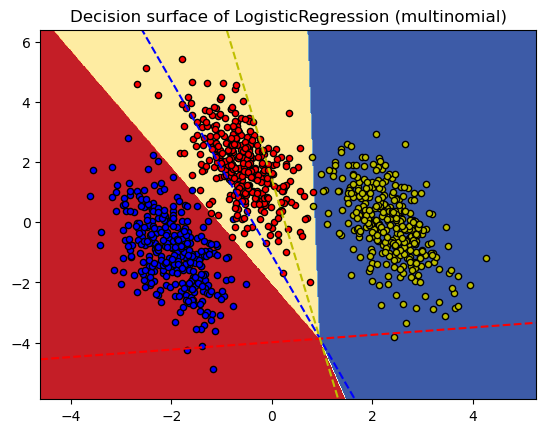

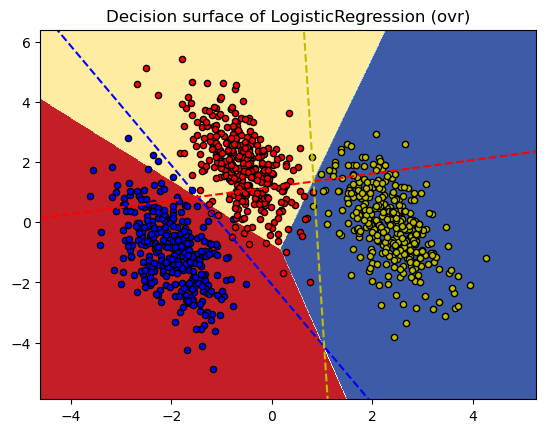

In [12]:
""" Dataset creation:
    Plot the decision boundary (assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max])
    It then subtracts 1 from the minimum value of the first feature and adds 1 to the maximum value of the first feature, 
    and similarly for the second feature. This enlarges the range of the feature space slightly, 
    so that the decision boundary is not plotted too close to the edge of the plot.
"""
## 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
## Make a linear transformation
transformation = [[0.4, 0.2], [-0.4, 1.2]]                                     
X = np.dot(X, transformation)

# Two different multi-class settings (multinomial and ovr)
for multi_class in ('multinomial', 'ovr'):                                      
    # Sag solver => maximum of 100 iterations and a random state of 42. 
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42, multi_class=multi_class).fit(X, y)
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    
    ##### Mesh to plot in
    #step size in the mesh
    h = .02                                                                     
    # Subtract 1 from the min val of first feature
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1                         
    # Add 1 to the max val of first feature to add space between the decision boundary and the edge of the plot
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1                         
    # Obtain the vectors that span the range of the feature space, with a step size of h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                            
                        np.arange(y_min, y_max, h))

    # Transform to 1d 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                              
    Z = Z.reshape(xx.shape)                                                     
    
    # cmap = plt.cm.get_cmap('RdYlBu')
    # cmap = matplotlib.colormaps[name] 
    cmap = matplotlib.colormaps.get_cmap('RdYlBu')    
    plt.figure()
    #### Plot the decision surface as a color contour 
    # plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)        #get plt.cm.Paired is deprecated!
    plt.contourf(xx, yy, Z, cmap=cmap)                                          
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    ####### Plot also the training scatter points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=20)     
        # dont pass => cmap=plt.cm.Paired, it will be ignored warning
        
    ## Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

<span style="font-size: 20px; color:#EC804A">
2-class dataset for classification
</span>

training score : 0.870 (multinomial)
training score : 0.870 (ovr)


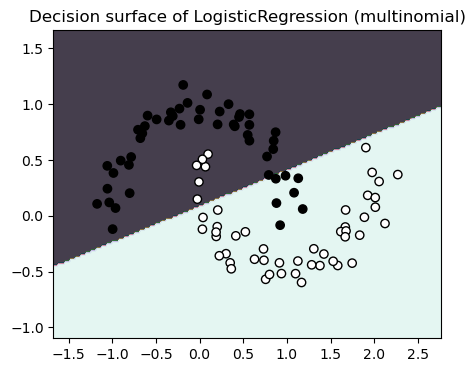

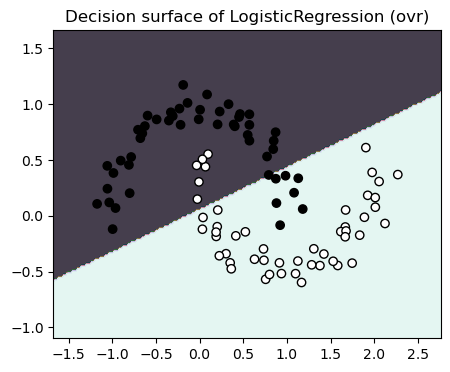

In [40]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42,
                            multi_class=multi_class).fit(X, y)
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    
    # Create the meshgrid 
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #cmap = plt.cm.get_cmap('coolwarm')         #deprecated in Matplotlib 3.7!
    matplotlib.colormaps.get_cmap('coolwarm')

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

plt.show()

<span style="font-size: 20px; color:#EC804A">
3-class dataset for classification
</span>

training score : 0.960 (multinomial)
training score : 0.940 (ovr)


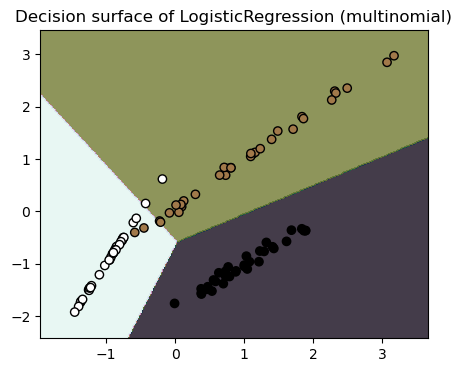

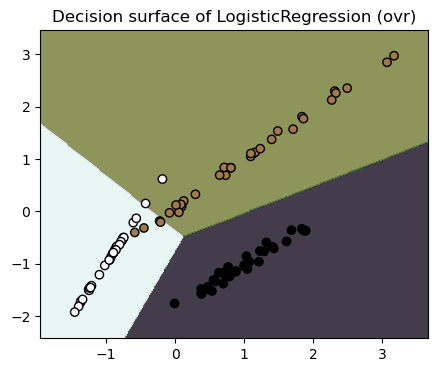

In [42]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=1, n_classes=3, random_state=42)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42,
                            multi_class=multi_class).fit(X, y)
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    
    ## Mesh 
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    ## Plot
    #cmap = plt.cm.get_cmap('cubehelix')             #deprecated in Matplotlib 3.7!
    matplotlib.colormaps.get_cmap('cubehelix')    
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

plt.show()